<a href="https://colab.research.google.com/github/kphprateek/BigData/blob/main/BigDataDivision_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


**Dividing the Dataset into set of groups**

In [3]:
import pandas as pd
data=pd.read_csv('gdrive/MyDrive/TwitterData.csv')

In [4]:
data.head(6)

,tweet_id,tweet_created_at,tweet_created_on_holiday_bool,tweet_created_on_weekend_bool,tweet_created_at_noon_bool,tweet_created_at_eve_bool,user_id,user_screen_name,user_screen_name_length,user_no_of_tweets,user_no_of_followers,user_no_of_followings,user_account_age,user_no_of_favourites,user_average_tweets,user_average_favourites,user_account_location,tweet_text,tweet_text_length,tweet_text_optimal_length,tweet_text_no_of_hashtags,tweet_text_contains_hashtags,tweet_text_contains_url,tweet_text_no_of_user_mentions,tweet_text_contains_user_mentions,tweet_text_sentiment,tweet_text_contains_media,tweet_text_contains_number,tweet_text_contains_upper_words,tweet_text_contains_lower_words,tweet_text_contains_excl,tweet_text_contains_retweet_suggestion,retweeted,retweets
0,~1357587318119407616~,Fri Feb 05 07:10:14 +0000 2021,0,0,0,0,~327890669~,mavirise,8,4355,49,57,3506,801,1.242156,0.228465,"Shimla Urban, India",104 Govt should repeal anti farmer laws !! #Fa...,99,1,3,1,0,0,0,nue,0,1,0,1,1,0,False,0
1,~1357587287681323010~,Fri Feb 05 07:10:06 +0000 2021,0,0,0,0,~327890669~,mavirise,8,4355,49,57,3506,801,1.242156,0.228465,"Shimla Urban, India",103 Govt should repeal anti farmer laws !! #Fa...,99,1,3,1,0,0,0,nue,0,1,0,1,1,0,False,0
2,~1357587268689485825~,Fri Feb 05 07:10:02 +0000 2021,0,0,0,0,~1216545386040418304~,aman89086818,12,48,0,7,389,39,0.123393,0.100257,NaN,Thank you internaltional celebrity who stand w...,75,1,1,1,0,0,0,nue,0,0,0,1,0,0,False,0
3,~1357587262469525507~,Fri Feb 05 07:10:00 +0000 2021,0,0,0,0,~1731144182~,jagbirsingh111,14,196,2,10,2710,97,0.072325,0.035793,NaN,@cnni They are just govt's puppet.that's why t...,129,0,2,1,0,1,1,neg,0,0,0,1,0,0,False,0
4,~1357587255699775488~,Fri Feb 05 07:09:59 +0000 2021,0,0,0,0,~327890669~,mavirise,8,4355,49,57,3506,801,1.242156,0.228465,"Shimla Urban, India",102 Govt should repeal anti farmer laws !! #Fa...,99,1,3,1,0,0,0,nue,0,1,0,1,1,0,False,0
5,~1357587252793102339~,Fri Feb 05 07:09:58 +0000 2021,0,0,0,0,~1176438349915013122~,Shabas32906868,14,52,5,44,500,62,0.104000,0.124000,NaN,It is the BJP led Government who defame our co...,140,0,0,0,1,0,0,nue,0,1,1,1,0,0,False,0


In [ ]:
#Shape of the data.
data.shape

(25694, 34)

In [ ]:
#data type of every column.
data.dtypes

tweet_id                                   object
tweet_created_at                           object
tweet_created_on_holiday_bool               int64
tweet_created_on_weekend_bool               int64
tweet_created_at_noon_bool                  int64
tweet_created_at_eve_bool                   int64
user_id                                    object
user_screen_name                           object
user_screen_name_length                     int64
user_no_of_tweets                           int64
user_no_of_followers                        int64
user_no_of_followings                       int64
user_account_age                            int64
user_no_of_favourites                       int64
user_average_tweets                       float64
user_average_favourites                   float64
user_account_location                      object
tweet_text                                 object
tweet_text_length                           int64
tweet_text_optimal_length                   int64


In [ ]:
#Trying to see where most of the data lies.
data['retweets'].describe()

count    25694.000000
mean         9.884954
std        415.079240
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      62666.000000
Name: retweets, dtype: float64

Text(0, 0.5, 'Probability Density')

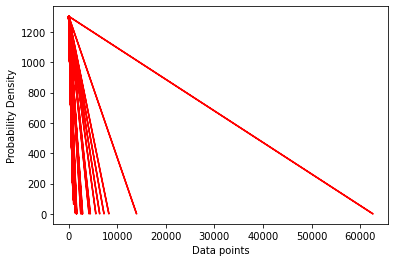

In [ ]:
#trying to plot normal distribution and find out insights about the data.
#finding out how the data is Divided?.
import numpy as np
import matplotlib.pyplot as plt
 


 
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = np.mean(data['retweets'])
sd = np.std(data['retweets'])
 
#Apply function to the data.
pdf = normal_dist(data['retweets'],mean,sd)
 
#Plotting the Results
plt.plot(data['retweets'],pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

{'boxes': [<matplotlib.lines.Line2D at 0x7f25303957d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2530396890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f253039a8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f253039a390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2530395dd0>,
  <matplotlib.lines.Line2D at 0x7f2530396350>]}

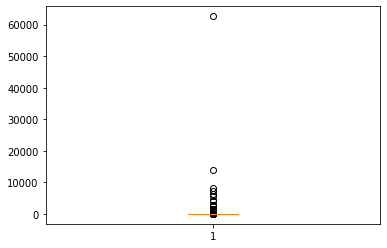

In [ ]:
#maximum numbers of points lies at 0.
import matplotlib.pyplot as plt
plt.boxplot(data['retweets'])

In [ ]:
#finding unique values in each column
n = data.nunique(axis=0)

In [ ]:
n

tweet_id                                  25666
tweet_created_at                          21778
tweet_created_on_holiday_bool                 1
tweet_created_on_weekend_bool                 2
tweet_created_at_noon_bool                    2
tweet_created_at_eve_bool                     2
user_id                                   13751
user_screen_name                          13753
user_screen_name_length                      12
user_no_of_tweets                          5080
user_no_of_followers                       2127
user_no_of_followings                      1881
user_account_age                           3745
user_no_of_favourites                      5655
user_average_tweets                       12834
user_average_favourites                   12971
user_account_location                      2982
tweet_text                                25422
tweet_text_length                           129
tweet_text_optimal_length                     2
tweet_text_no_of_hashtags               

In [ ]:
#As we can see most of the retweets are done 0 then 1 and so on.
#more than 50% of data itself lies in 0(i.e No retweets).
s = pd.value_counts(data['retweets'])
s


0      15827
1       4677
2       1683
3        776
4        498
       ...  
424        1
216        1
200        1
184        1
407        1
Name: retweets, Length: 294, dtype: int64

**As most of the data is in 0 retweets,Hence I am dividing it into 3 parts and combining the values which are >=2**

(array([  0., 150.,  83.,  47.,   3.,   3.,   1.,   1.,   1.]),
 array([  0,   1,   2,   5,  50, 100, 150, 200, 250, 300]),
 <a list of 9 Patch objects>)

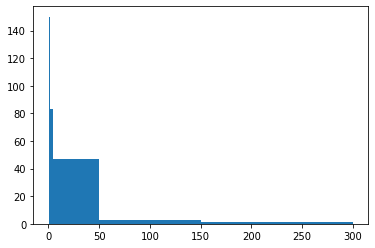

In [ ]:
#As we can see deciding the bins is a trivial task hence it is better to choose a method to find the best number of bins.
plt.hist(s,bins=[0,1,2,5,50,100,150,200,250,300])

In [ ]:
#Here I am using freedman_diaconis method to find the optimal number of bins.
import numpy as np
from scipy import stats


def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)

In [ ]:
freedman_diaconis(data=s, returnas="width")

0.9023370853794829

In [ ]:
#There are more methods of finding Bins, we can use any one of them.
freedman_diaconis(data=s, returnas="bins")

17539

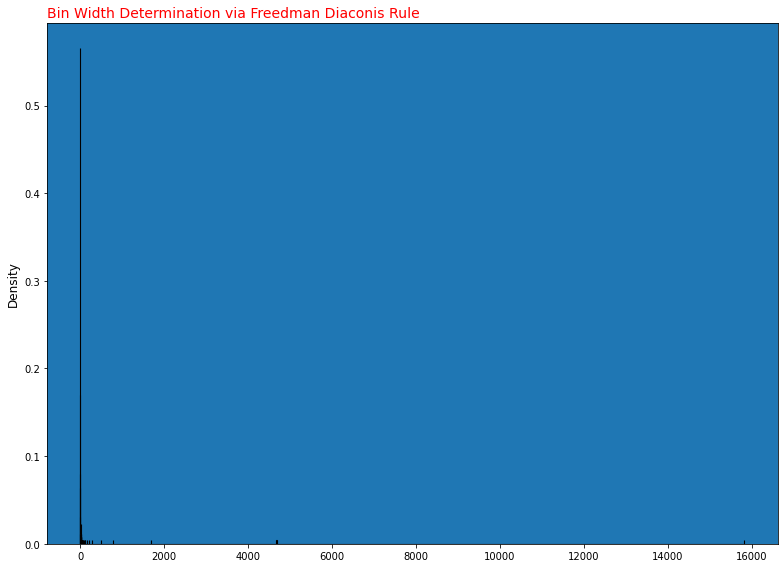

In [ ]:
#Now we can better visualise the dataset,How it is distributed.
#As we can we with this histogram diagram the probabilty of data 50% and more tweets is in case of 0, and so on as shown by black lines.
import matplotlib as mpl
import matplotlib.pyplot as plt

# Use freedman_diaconis function with returnas="bins" to determine histogram bin width.
NBR_BINS = freedman_diaconis(data=s, returnas="bins")

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(11, 8)
ax.hist(s, NBR_BINS, density=True, color="#FFFFFF", edgecolor="black", linewidth=1.1)
ax.set_title("Bin Width Determination via Freedman Diaconis Rule", fontsize=14, loc="left", color="red")
ax.set_ylabel("Density", fontsize=12, color="#000000")
ax.grid(False)
ax.set_facecolor(None)
plt.tight_layout()
plt.show()

In [ ]:
#Conclusion So I decided to divide the dataset into 5 parts each of approx 5000 rows,As we can see below.

In [ ]:
dataset1=data[data['retweets']==0]

In [ ]:
dataset1.shape

(15827, 34)

In [ ]:
#divinding the dataset into 3 equal parts
import numpy as np
df_split = np.array_split(dataset1, 3)

In [ ]:
dataset1=df_split[0]
dataset2=df_split[1]
dataset3=df_split[2]

In [ ]:
dataset1.head(2)

,tweet_id,tweet_created_at,tweet_created_on_holiday_bool,tweet_created_on_weekend_bool,tweet_created_at_noon_bool,tweet_created_at_eve_bool,user_id,user_screen_name,user_screen_name_length,user_no_of_tweets,user_no_of_followers,user_no_of_followings,user_account_age,user_no_of_favourites,user_average_tweets,user_average_favourites,user_account_location,tweet_text,tweet_text_length,tweet_text_optimal_length,tweet_text_no_of_hashtags,tweet_text_contains_hashtags,tweet_text_contains_url,tweet_text_no_of_user_mentions,tweet_text_contains_user_mentions,tweet_text_sentiment,tweet_text_contains_media,tweet_text_contains_number,tweet_text_contains_upper_words,tweet_text_contains_lower_words,tweet_text_contains_excl,tweet_text_contains_retweet_suggestion,retweeted,retweets
0,~1357587318119407616~,Fri Feb 05 07:10:14 +0000 2021,0,0,0,0,~327890669~,mavirise,8,4355,49,57,3506,801,1.242156,0.228465,"Shimla Urban, India",104 Govt should repeal anti farmer laws !! #Fa...,99,1,3,1,0,0,0,nue,0,1,0,1,1,0,False,0
1,~1357587287681323010~,Fri Feb 05 07:10:06 +0000 2021,0,0,0,0,~327890669~,mavirise,8,4355,49,57,3506,801,1.242156,0.228465,"Shimla Urban, India",103 Govt should repeal anti farmer laws !! #Fa...,99,1,3,1,0,0,0,nue,0,1,0,1,1,0,False,0


In [ ]:
dataset2.head(2)

,tweet_id,tweet_created_at,tweet_created_on_holiday_bool,tweet_created_on_weekend_bool,tweet_created_at_noon_bool,tweet_created_at_eve_bool,user_id,user_screen_name,user_screen_name_length,user_no_of_tweets,user_no_of_followers,user_no_of_followings,user_account_age,user_no_of_favourites,user_average_tweets,user_average_favourites,user_account_location,tweet_text,tweet_text_length,tweet_text_optimal_length,tweet_text_no_of_hashtags,tweet_text_contains_hashtags,tweet_text_contains_url,tweet_text_no_of_user_mentions,tweet_text_contains_user_mentions,tweet_text_sentiment,tweet_text_contains_media,tweet_text_contains_number,tweet_text_contains_upper_words,tweet_text_contains_lower_words,tweet_text_contains_excl,tweet_text_contains_retweet_suggestion,retweeted,retweets
7512,~1357275693986377731~,Thu Feb 04 10:31:57 +0000 2021,0,0,0,0,~1357180959595003904~,chidchidhi,10,36,2,147,1,13,36.000000,13.000000,NaN,Then #Modi is a supporter of farmers!\n\n#Indi...,133,0,5,1,1,0,0,nue,0,1,0,1,1,1,False,0
7513,~1357275687946657797~,Thu Feb 04 10:31:55 +0000 2021,0,0,0,0,~1311966096455421952~,Aman90215884,12,16,8,22,126,2,0.126984,0.015873,NaN,@EnoB Thank you #StandWithFarmers,33,0,1,1,0,1,1,nue,0,0,0,0,0,0,False,0


In [ ]:
dataset3.head(2)

,tweet_id,tweet_created_at,tweet_created_on_holiday_bool,tweet_created_on_weekend_bool,tweet_created_at_noon_bool,tweet_created_at_eve_bool,user_id,user_screen_name,user_screen_name_length,user_no_of_tweets,user_no_of_followers,user_no_of_followings,user_account_age,user_no_of_favourites,user_average_tweets,user_average_favourites,user_account_location,tweet_text,tweet_text_length,tweet_text_optimal_length,tweet_text_no_of_hashtags,tweet_text_contains_hashtags,tweet_text_contains_url,tweet_text_no_of_user_mentions,tweet_text_contains_user_mentions,tweet_text_sentiment,tweet_text_contains_media,tweet_text_contains_number,tweet_text_contains_upper_words,tweet_text_contains_lower_words,tweet_text_contains_excl,tweet_text_contains_retweet_suggestion,retweeted,retweets
14931,~1357590047281668096~,Fri Feb 05 07:21:04 +0000 2021,0,0,0,0,~1170327988577038338~,JainulA29698974,15,3,1,21,517,9,0.005803,0.017408,NaN,#FarmersAreIndia stand with Indian farmer,41,0,1,1,0,0,0,nue,0,0,0,1,0,0,False,0
14936,~1357589956911243265~,Fri Feb 05 07:20:43 +0000 2021,0,0,0,0,~1106037024195141632~,SanjuRavish2,12,581,10,46,694,1352,0.837176,1.948127,NaN,@RajatSharmaLive Never trust godi media😂😂 ...T...,131,0,0,0,1,5,1,nue,0,1,0,1,0,0,False,0


In [ ]:
print(dataset1.shape)
print(dataset2.shape)
print(dataset3.shape)


(5276, 34)
(5276, 34)
(5275, 34)


In [ ]:
dataset4=data[data['retweets']==1]

In [ ]:
dataset4.head(5)

,tweet_id,tweet_created_at,tweet_created_on_holiday_bool,tweet_created_on_weekend_bool,tweet_created_at_noon_bool,tweet_created_at_eve_bool,user_id,user_screen_name,user_screen_name_length,user_no_of_tweets,user_no_of_followers,user_no_of_followings,user_account_age,user_no_of_favourites,user_average_tweets,user_average_favourites,user_account_location,tweet_text,tweet_text_length,tweet_text_optimal_length,tweet_text_no_of_hashtags,tweet_text_contains_hashtags,tweet_text_contains_url,tweet_text_no_of_user_mentions,tweet_text_contains_user_mentions,tweet_text_sentiment,tweet_text_contains_media,tweet_text_contains_number,tweet_text_contains_upper_words,tweet_text_contains_lower_words,tweet_text_contains_excl,tweet_text_contains_retweet_suggestion,retweeted,retweets
12,~1357587140624879616~,Fri Feb 05 07:09:31 +0000 2021,0,0,0,0,~801331985885134848~,Shankardev12,12,23902,278,654,1535,29000,15.571336,18.892508,NaN,@miakhalifa @aapsur I still #StandWithFarmers ...,140,0,1,1,1,2,1,neg,0,1,1,1,0,1,False,1
21,~1357586912437932038~,Fri Feb 05 07:08:37 +0000 2021,0,0,0,0,~327890669~,mavirise,8,4355,49,57,3506,801,1.242156,0.228465,"Shimla Urban, India",97 Govt should repeal anti farmer laws !! #Far...,98,1,3,1,0,0,0,nue,0,1,0,1,1,0,False,1
35,~1357586402247139328~,Fri Feb 05 07:06:35 +0000 2021,0,0,0,0,~1333220921562124289~,SukhrajBandesha,15,131,21,29,67,601,1.955224,8.970149,"Fatehgarh Churian, India",This network cannot be stopped\n#FarmersAreInd...,130,0,4,1,1,0,0,nue,0,1,0,1,0,0,False,1
41,~1357586212534456327~,Fri Feb 05 07:05:50 +0000 2021,0,0,0,0,~728930059319312384~,Akshayjethi1,12,3780,40,40,1734,8210,2.179931,4.734717,"vadodara, gujarat","#StandWithFarmers big b is big coward, he is o...",71,1,1,1,0,0,0,neg,0,0,0,1,0,0,False,1
42,~1357586187058376704~,Fri Feb 05 07:05:44 +0000 2021,0,0,0,0,~1282912420021837824~,Amanjot26389479,15,17,4,14,206,52,0.082524,0.252427,"Punjab, India",Thankx #StandWithFarmers #FarmerProtest https...,64,0,2,1,1,0,0,nue,0,1,0,0,0,0,False,1


In [ ]:
dataset4.shape

(4677, 34)

In [ ]:
dataset5=data[data['retweets']>1]

In [ ]:
dataset5.shape

(5190, 34)

In [ ]:
dataset5.head(2)

,tweet_id,tweet_created_at,tweet_created_on_holiday_bool,tweet_created_on_weekend_bool,tweet_created_at_noon_bool,tweet_created_at_eve_bool,user_id,user_screen_name,user_screen_name_length,user_no_of_tweets,user_no_of_followers,user_no_of_followings,user_account_age,user_no_of_favourites,user_average_tweets,user_average_favourites,user_account_location,tweet_text,tweet_text_length,tweet_text_optimal_length,tweet_text_no_of_hashtags,tweet_text_contains_hashtags,tweet_text_contains_url,tweet_text_no_of_user_mentions,tweet_text_contains_user_mentions,tweet_text_sentiment,tweet_text_contains_media,tweet_text_contains_number,tweet_text_contains_upper_words,tweet_text_contains_lower_words,tweet_text_contains_excl,tweet_text_contains_retweet_suggestion,retweeted,retweets
51,~1357585935391678468~,Fri Feb 05 07:04:44 +0000 2021,0,0,0,0,~1269165526040772611~,JabbarShaloob,13,25,14,76,244,31,0.102459,0.127049,"Kerala, India",@rihanna: Income tax department in India can't...,124,0,1,1,1,1,1,pos,0,1,0,1,0,1,False,2
83,~1357583746317303808~,Fri Feb 05 06:56:02 +0000 2021,0,0,0,0,~1273283436090802176~,Nargis_Ansari74,15,9182,66416,5155,232,17100,39.577586,73.706897,NaN,I am indian farmer I am not a terrorist .... \...,64,0,1,1,0,0,0,nue,0,0,1,1,0,0,False,47


#Second lab Doing Exploration: Distribution(continuous), Anomalies, various exploratory graphs.

**#Finding which continuos variables are falling into outlier and removing it or replacing it by mean value.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


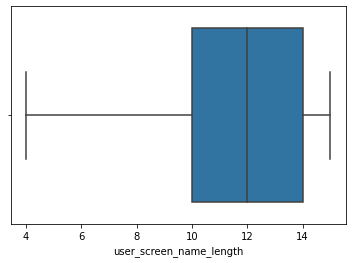

In [ ]:
#Showing that the box is symmetrical at 12.
import seaborn as sns
sns.boxplot(data['user_screen_name_length'])

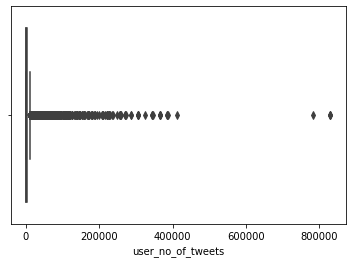

In [ ]:
#outliers are present.
sns.boxplot(x=data['user_no_of_tweets'])

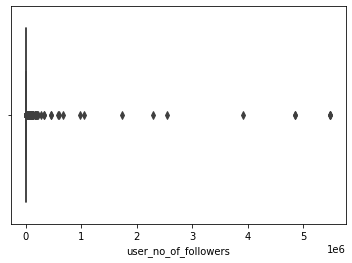

In [ ]:
#outliers are present
sns.boxplot(x=data['user_no_of_followers'])

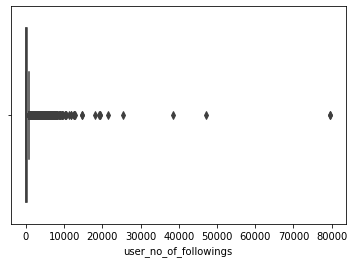

In [ ]:
#outliers are present
sns.boxplot(x=data['user_no_of_followings'])

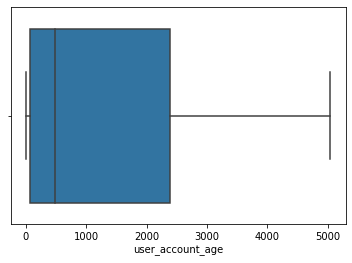

In [ ]:
#right skewed
sns.boxplot(x=data['user_account_age'])

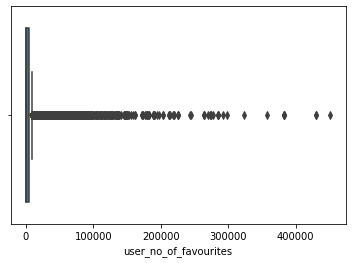

In [ ]:
#outliers are present
sns.boxplot(x=data['user_no_of_favourites'])

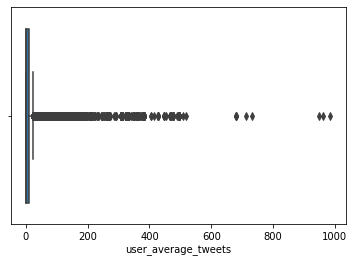

In [ ]:
#outliers are present.
sns.boxplot(x=data['user_average_tweets'])

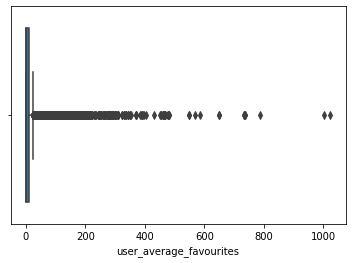

In [ ]:
sns.boxplot(x=data['user_average_favourites'])

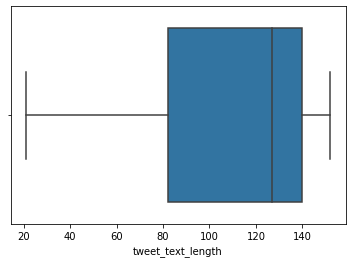

In [ ]:
#left skewed
sns.boxplot(x=data['tweet_text_length'])

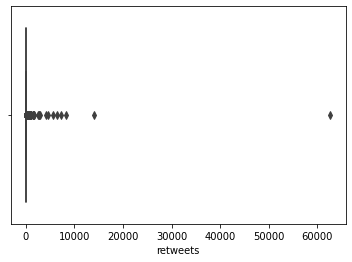

In [ ]:
sns.boxplot(x=data['retweets'])

In [46]:
df = data.filter(['user_screen_name_length','user_no_of_tweets','user_no_of_followers','user_no_of_followings','user_no_of_favourites','tweet_text_length','user_account_age','user_average_tweets'], axis=1)

In [47]:
df.shape

(25694, 8)

#Replacing the values which are below 0.01 and above 0.99 with its extreme values.

In [49]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col].iloc[df[col] <= percentiles[0]] = percentiles[0]
            df[col].iloc[df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  user_screen_name_length
capping the  user_no_of_tweets
capping the  user_no_of_followers
capping the  user_no_of_followings
capping the  user_no_of_favourites
capping the  tweet_text_length
capping the  user_account_age
capping the  user_average_tweets


In [50]:
print(final_df.head(6))

   user_screen_name_length  ...  user_average_tweets
0                      8.0  ...             1.242156
1                      8.0  ...             1.242156
2                     12.0  ...             0.123393
3                     14.0  ...             0.072325
4                      8.0  ...             1.242156
5                     14.0  ...             0.104000

[6 rows x 8 columns]


In [51]:
final_df

,user_screen_name_length,user_no_of_tweets,user_no_of_followers,user_no_of_followings,user_no_of_favourites,tweet_text_length,user_account_age,user_average_tweets
0,8.0,4355.0,49.0,57.0,801.0,99.0,3506.0,1.242156
1,8.0,4355.0,49.0,57.0,801.0,99.0,3506.0,1.242156
2,12.0,48.0,0.0,7.0,39.0,75.0,389.0,0.123393
3,14.0,196.0,2.0,10.0,97.0,129.0,2710.0,0.072325
4,8.0,4355.0,49.0,57.0,801.0,99.0,3506.0,1.242156
...,...,...,...,...,...,...,...,...
25689,10.0,166.0,8.0,18.0,100.0,133.0,60.0,2.766667
25690,13.0,1990.0,335.0,402.0,2722.0,140.0,2126.0,0.936030
25691,10.0,166.0,8.0,18.0,100.0,128.0,60.0,2.766667
25692,12.0,1629.0,271.0,603.0,1117.0,133.0,296.0,5.503378


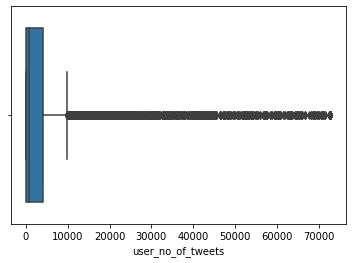

In [52]:
sns.boxplot(x=final_df['user_no_of_tweets'])

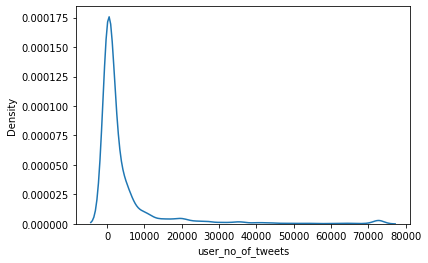

In [53]:
sns.kdeplot(final_df['user_no_of_tweets'])

In [54]:
#No rows remains the same.
final_df.shape

(25694, 8)

#Trying to check how the data will be changed when the outlier is removed.

In [55]:

from scipy import stats                 #finding outlier using z-score
import numpy as np                           
z = np.abs(stats.zscore(df))
print(z)

[[1.56414077e+00 3.33690416e-02 2.56739652e-01 ... 3.37114215e-01
  1.59475488e+00 3.36272760e-01]
 [1.56414077e+00 3.33690416e-02 2.56739652e-01 ... 3.37114215e-01
  1.59475488e+00 3.36272760e-01]
 [2.89213139e-04 4.19011087e-01 2.84513859e-01 ... 1.05170170e+00
  6.27020659e-01 3.62223435e-01]
 ...
 [7.81925777e-01 4.08445551e-01 2.79979295e-01 ... 5.26345662e-01
  8.61529530e-01 3.00910423e-01]
 [2.89213139e-04 2.77450819e-01 1.30905489e-01 ... 6.75218054e-01
  6.93310401e-01 2.37430027e-01]
 [1.56414077e+00 3.51140952e-01 1.71716569e-01 ... 5.85894618e-01
  8.57965566e-01 7.74569225e-02]]


In [56]:
threshold = 3                          #in most of the cases we take the value as 3
print(np.where(z > 3))

(array([    7,    26,    27, ..., 25684, 25684, 25684]), array([7, 2, 2, ..., 1, 2, 3]))


In [57]:
newdata1 = df[(z < 3).all(axis=1)] 

In [58]:
#No of rows gets reduced.
newdata1.shape

(23414, 8)

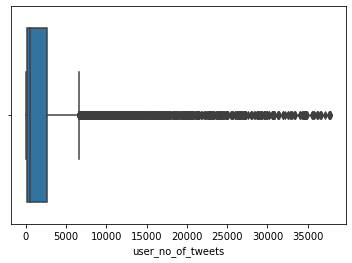

In [59]:
import seaborn as sns
sns.boxplot(x=newdata1['user_no_of_tweets'])

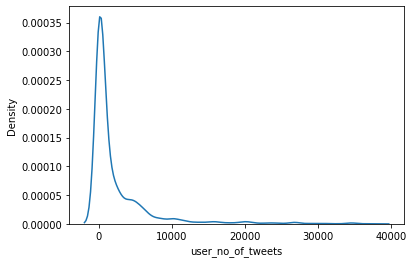

In [60]:
sns.kdeplot(newdata1['user_no_of_tweets'])

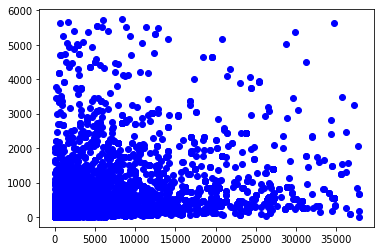

In [70]:
#It shows that no of followers do not depend on the no of tweets.
import matplotlib.pyplot as plt
plt.scatter(newdata1['user_no_of_tweets'], newdata1['user_no_of_followers'], c ="blue")
  
# To show the plot
plt.show()